## K Means Algorithm

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import random

<img src="Images/k_means_ex.png" width="400" />

### Iris Data

In [2]:
iris = pd.read_csv("iris_data.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
X = np.array(iris.iloc[0:100,[0,2]])#Extracting 100 rows from columns 0,2
y = iris.iloc[0:100, 4].values #Extracting 100 rows as array

### Plotting Data

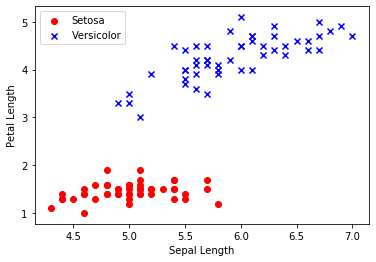

In [8]:
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')

plt.show()

#### Finding Optimal Clusters

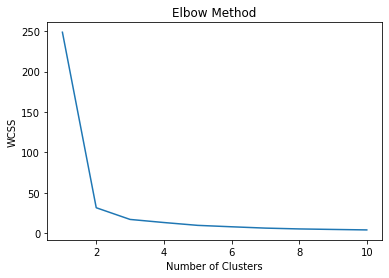

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

$$J=\sum_{j=1}^{k} \sum_{i=1}^{n}\left\|x_{i}^{(j)}-c_{j}\right\|^{2}$$

In [32]:
kmeans= KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

#### K-Means Algorithm prediction for Class Labels

In [33]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


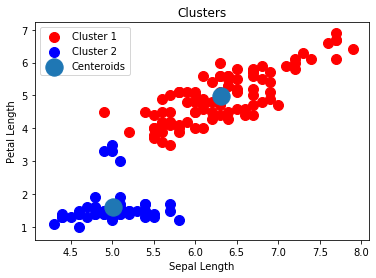

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #Setosa
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #Versicolor
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centeroids')
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

### K-Means Algorithm with 3 classes

In [14]:
X = np.array(iris.iloc[0:150,[0,2]])#Extracting 100 rows from columns 0,2


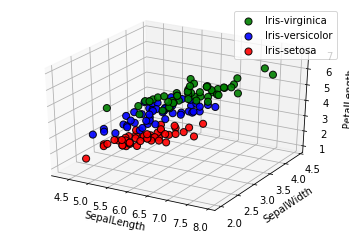

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
global grafico #figure
#Function scatter_plot group data by argument name, plot and edit labels
def scatter_plot(x_label,y_label,z_label,clase,c,m,label):
    x = data[ data['Name'] == clase ][x_label] #groupby Name column x_label
    y = data[ data['Name'] == clase ][y_label]
    z = data[ data['Name'] == clase ][z_label]
    # s: size point; alpha: transparent 0, opaque 1; label:legend
    grafico.scatter(x,y,z,color=c, edgecolors='k',s=50, alpha=0.9, marker=m,label=label)
    grafico.set_xlabel(x_label)
    grafico.set_ylabel(y_label)
    grafico.set_zlabel(z_label)
    return 

grafico = plt.figure().gca(projection='3d')  #new figure
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-virginica','g','o','Iris-virginica')
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-versicolor','b','o','Iris-versicolor')
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-setosa','r','o','Iris-setosa')
plt.legend()
plt.show()

### Finding Optimal Number of Clusters

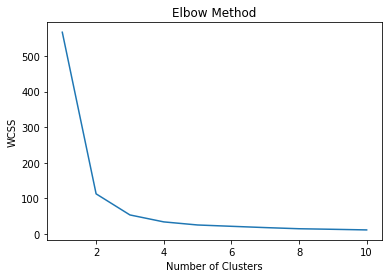

In [39]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans= KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [41]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


#### References:
https://github.com/camila-ud/3D-Scatter-plot/blob/master/3DScatterIris.py